<a href="https://colab.research.google.com/github/kjyesta/EXPLORATORY-DATA-ANALYSIS/blob/master/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 proposal

### Data source location:-

The Dataset is available for free download using the below link.
https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv

For overview and more info:
https://data.london.gov.uk/dataset/number-international-visitors-london


### Data source Discovery:-
I found this Dataset in one of the links provided in the Data sources in Blackboard. I went through a lot of other Datasets but I felt that this Dataset has interesting hypotheses around it and a lot of analysis can be done on it.

### Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.

### Documented EDA:-
There's no such EDA or Visualization available on the web for this Dataset.


### Project Proposal:-
The size of this Dataset is 4.99 MB with 11 columns and 58977 rows and this file with these many records fits perfectly into the Data 601 Objectives of Project-2. A lot of good questions can be asked about this data

For Example some Hypothesis about which we are going to Analyse are:-

1: Did fewer tourists traveled to London during the recession period?

2: Does London see more visitors in Quarter 4?(Oct-Dec)

3: Do business travelers spend less nights in London when compared to others?

4: During which quarters of an year is London likely to see more visitors?

5: London sees more visitors from european countries?



In [0]:
#Import the required packages that are required for doing analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Read the data from the csv using the download link into a Dataframe directly
visitors_data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python')
print('(Number of rows, Columns)')
visitors_data.shape




(Number of rows, Columns)


(59804, 11)

### Just go through the Data that has been loaded into the DataFrame

In [0]:
#Just for an overview look at all the columns
visitors_data.describe(include='all')

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
count,59804,59804,59804,59804,59804,59804,59804,59804.000000,59804.000000,59804.000000,59804.000000
unique,18,4,62,4,3,5,1,NaN,NaN,NaN,NaN
top,2013,July-September,France,1-3 nights,Air,Holiday,LONDON,NaN,NaN,NaN,NaN
freq,3572,16736,2565,19180,45387,19141,59804,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.711122,2.817894,28.747568,6.155107
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.650178,6.309306,60.170395,13.433533
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,0.000000,0.000261,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778425,0.309874,3.721876,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.693672,0.992692,10.109866,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.115899,2.787500,27.909398,5.000000


In [0]:
#check if there are any null values or not in the Data
visitors_data.isnull().sum()

year             0
quarter          0
market           0
dur_stay         0
mode             0
purpose          0
area             0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

We can see that there are no Null values in the Data

In [0]:
#Check for unique values per column present in the Data
visitors_data.nunique()

year                18
quarter              4
market              62
dur_stay             4
mode                 3
purpose              5
area                 1
Visits (000s)    53900
Spend (£m)       58917
Nights (000s)    58684
sample             194
dtype: int64

These are the unique values per column

## Let us look at the first Hypothesis  

### 1: Did fewer tourists traveled to London during the recession period? (2008 and 2009)

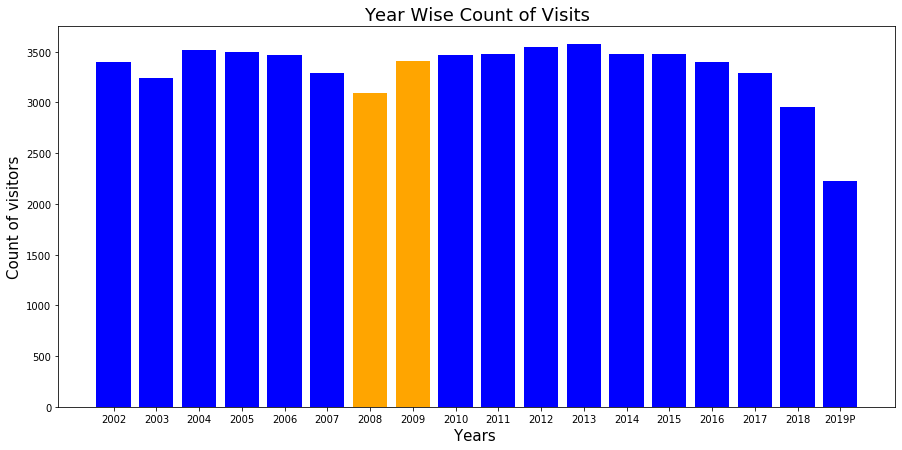

In [0]:
#Group by year and count the number of visits
Year_wise_count=visitors_data.groupby(['year']).count()['Visits (000s)']
plt.figure(figsize=(15,7))

#To plot different color for recession years
for i,v in a.iteritems():
    #print(type(i),v)
    if i in recession_years:
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='blue')

#Setting the titles, x and y labels        
_=plt.xlabel('Years ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Year Wise Count of Visits',fontsize=18)
plt.show()


We can see that there was a slight drop in 2008 but the count of visitors increased in 2009, so we can conclude that the hypothesis is true for one year but false for another

## Let us look at the second Hypothesis  

### 2: Does London see more visitors in Quarter 4?(Oct-Dec)

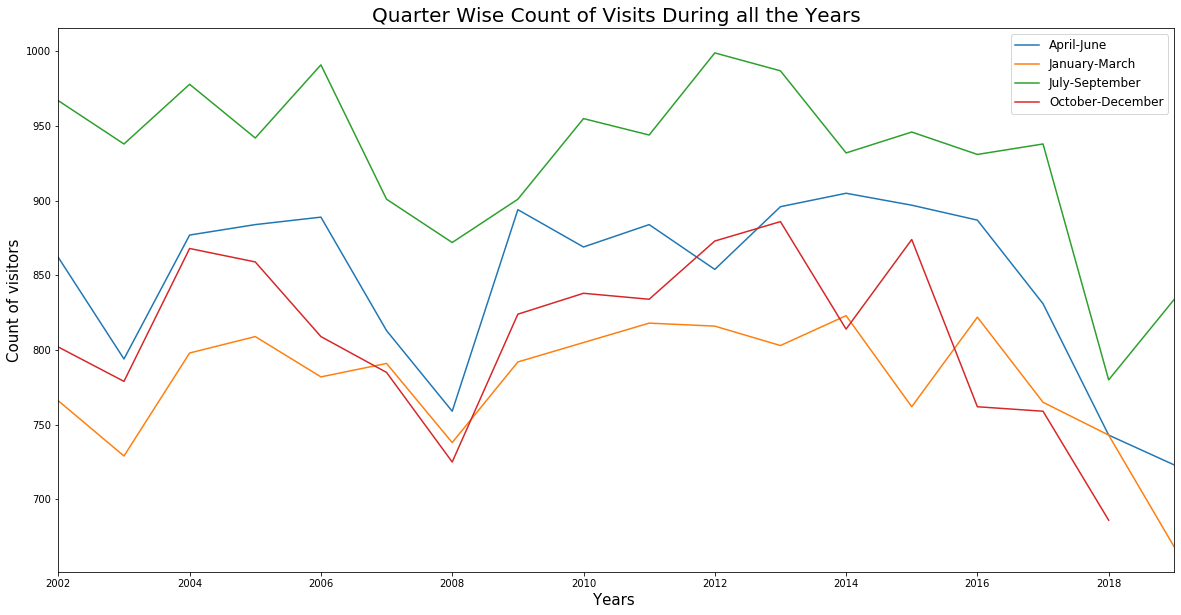

In [0]:
#Grouping by year and quarter and counting the number of visits and plotting a line graph
_=visitors_data.groupby(['year','quarter']).count()['Visits (000s)'].unstack().plot(kind='line',figsize=(20,10))

#Setting the titles, x and y labels and legends       
_=plt.xlabel('Years ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Quarter Wise Count of Visits During all the Years',fontsize=20)
_=plt.legend(loc=1,fontsize=12)
plt.show()


From the above graph it is clear that the hypothesis is wrong as London saw more visitors during Quarter-3(Jul-Sep) but not Quarter-4 and this was true for all the years

## Let us look at the third Hypothesis  

### 3: Do business travelers spend less nights in London when compared to others?

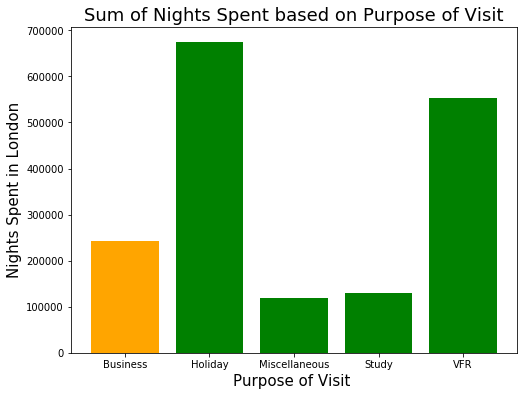

In [0]:
#Group by purpose of visit and sum the nights spent based on it
Night_purpose=visitors_data.groupby(['purpose']).sum()['Nights (000s)']

#Plot the figure and assign a different color for the Business type of visitors
plt.figure(figsize=(8,6))
for i,v in Night_purpose.iteritems():
    #print(type(i),v)
    if i=='Business':
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='green')

#Setting the titles, x and y labels and legends             
_=plt.xlabel('Purpose of Visit ',fontsize=15)
_=plt.ylabel('Nights Spent in London',fontsize=15)
_=plt.title('Sum of Nights Spent based on Purpose of Visit',fontsize=18)


plt.show()

Business Travelers did spend less nights compared to Holiday and VFR type of visitors but they spend more nights than the people visiting London for Study and Miscellaneous purpose

## Let us look at the fourth Hypothesis  

### 4: Do people who visit london for Holidays spend more than Business?

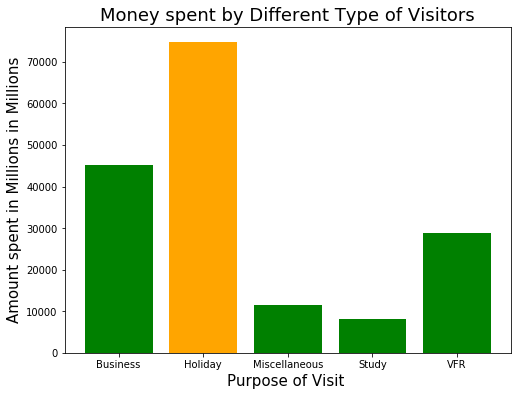

In [0]:
#Group by purpose and sum the amount spent
type_spend=visitors_data.groupby(['purpose']).sum()['Spend (£m)']

#plot the bar graph with different color to identify the money spent by people visiting for holiday purpose 
plt.figure(figsize=(8,6))
for i,v in type_spend.iteritems():
    #print(type(i),v)
    if i=='Holiday':
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='green')

#Setting the titles, x and y labels        
_=plt.xlabel('Purpose of Visit ',fontsize=15)
_=plt.ylabel('Amount spent in Millions in Millions',fontsize=15)
_=plt.title('Money spent by Different Type of Visitors',fontsize=18)
plt.show()

Yes, this hypothesis is true people who visit london for Holidays spend more than the people who visit for Business purpose

## Let us look at the fifth Hypothesis  

### 5: London sees more visitors from european countries?

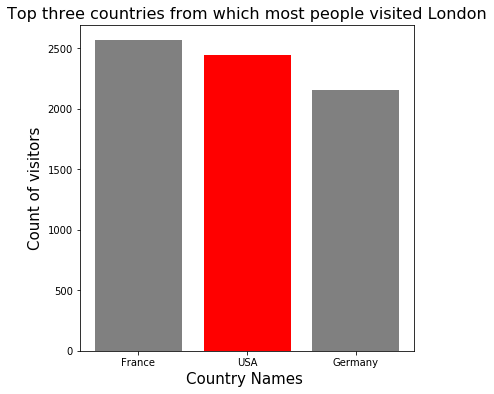

In [0]:
#Group by market(Countries) and count the number of visits 
n1=visitors_data.groupby(['market']).count()['Visits (000s)'].nlargest(3)

eur_countries=['France','Germany','Spain','Italy','Portugal']

#Check for european countries and if any other country comes in top 3 plot the bar with a different color
plt.figure(figsize=(6,6))
for i,v in n1.iteritems():
    #print(type(i),v)
    if i in eur_countries:
        _=plt.bar(i,v,color='grey')
    else:
        _=plt.bar(i,v,color='red')


#Setting the titles, x and y labels   
_=plt.xlabel('Country Names ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Top three countries from which most people visited London',fontsize=16)
plt.show()


This Hypothesis is wrong as the count of people from the united states visiting London takes the second place 

### Some General Visualisations 

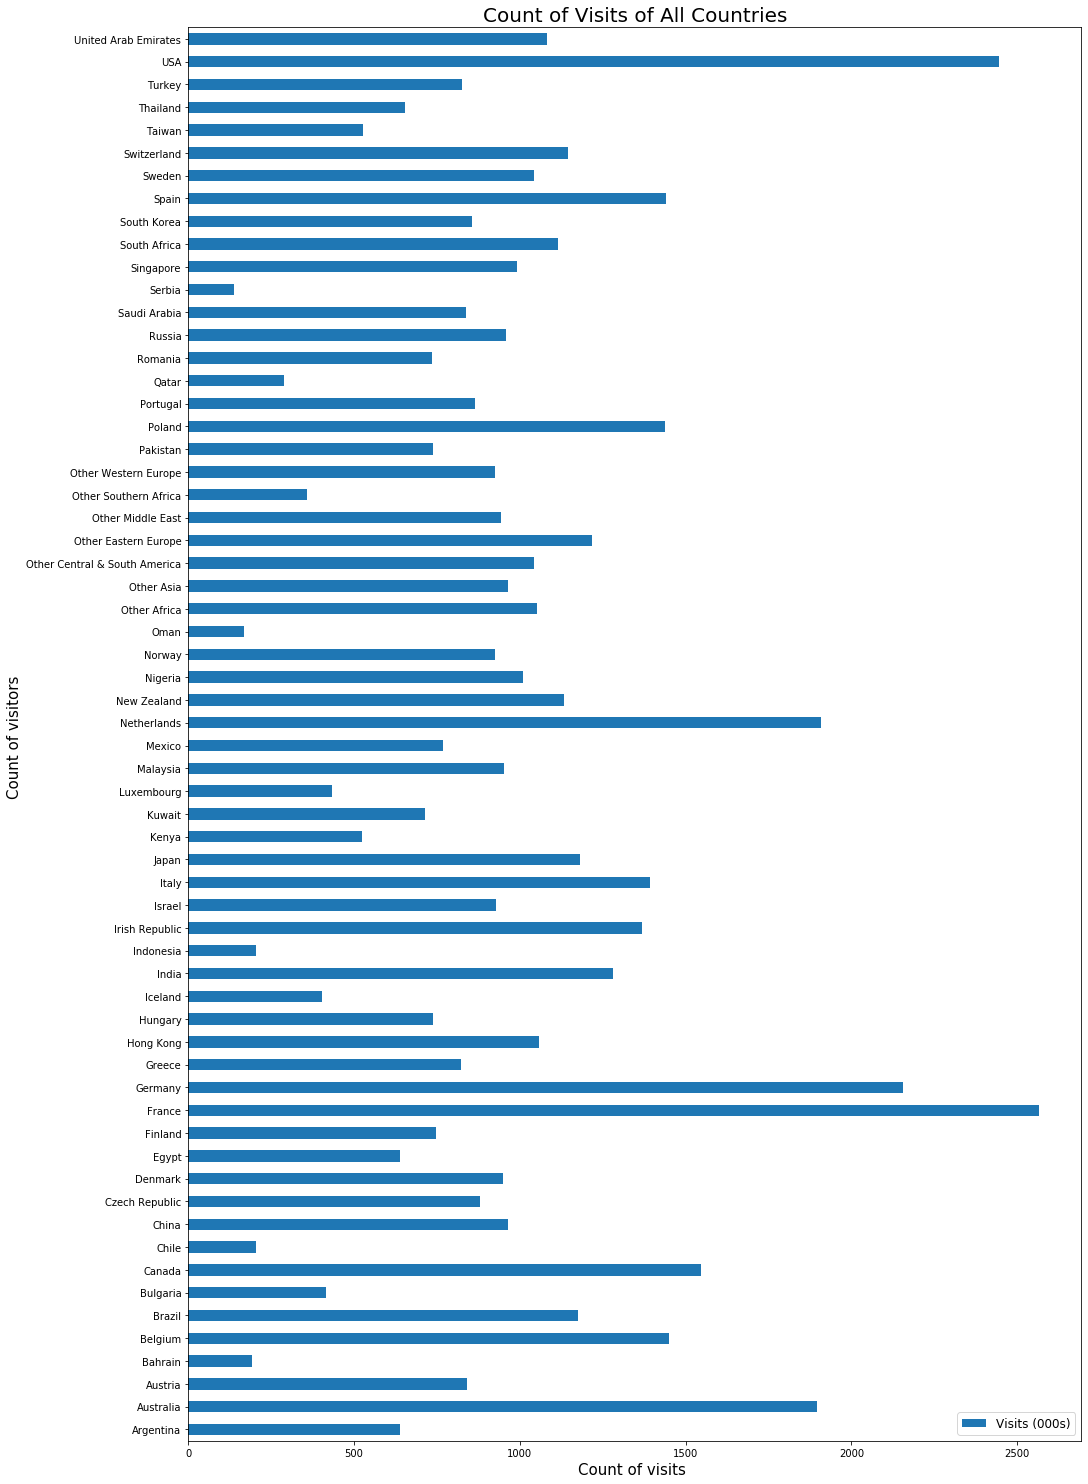

In [0]:
plt.figure(figsize=(16,26))
#Group by country and plot the count of visitors from all the countries
visitors_data.groupby(['market']).count()['Visits (000s)'].plot.barh()
_=plt.xlabel('Count of visits ',fontsize=15)
_=plt.ylabel('Count of visitors ',fontsize=15)
_=plt.title('Count of Visits of All Countries',fontsize=20)
_=plt.legend(fontsize=12)
plt.show()